In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Data Cleaning

In [2]:
# Import data
df = pd.read_csv('investor_data.csv')
df.head()

,risk,clientID,dateID,avgMonthlyIncome,education,expSavings,expTransport,expGroceries,expLeisure,expShopping,expUtilities,expOther,cardLevel,amountDeposit,amountLoan,avgTransaction,avgNumTransactions,largestSingleTransaction
0,0.592,user-0000000000000000,2021-11-01,272817.5,NaN,0.20,0.09,0.12,0.16,0.14,0.14,0.14,2,0.0,0.0,1454.8,185.5,49832.0
1,0.485,user-0000000000000001,2021-11-01,162850.8,college,0.16,0.15,0.11,0.14,0.14,0.12,0.17,0,0.0,100000.0,3005.4,173.9,49025.8
2,0.300,user-0000000000000002,2021-11-01,640200.6,college,0.18,0.08,0.09,0.13,0.23,0.10,0.19,1,50000.0,0.0,39649.6,556.2,19337.5
3,0.664,user-0000000000000003,2021-11-01,29308.5,BSc,0.12,0.13,0.07,0.18,0.26,0.15,0.08,2,0.0,0.0,22542.6,351.6,4724.4
4,0.643,user-0000000000000004,2021-11-01,420154.1,NaN,0.09,0.14,0.21,0.12,0.11,0.11,0.22,2,0.0,0.0,2744.4,310.5,5445.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   risk                      72000 non-null  float64
 1   clientID                  72000 non-null  object 
 2   dateID                    72000 non-null  object 
 3   avgMonthlyIncome          72000 non-null  float64
 4   education                 50400 non-null  object 
 5   expSavings                72000 non-null  float64
 6   expTransport              72000 non-null  float64
 7   expGroceries              72000 non-null  float64
 8   expLeisure                72000 non-null  float64
 9   expShopping               72000 non-null  float64
 10  expUtilities              72000 non-null  float64
 11  expOther                  72000 non-null  float64
 12  cardLevel                 72000 non-null  int64  
 13  amountDeposit             72000 non-null  float64
 14  amount

In [4]:
# Check for missing values
print(df.isnull().sum())

risk                            0
clientID                        0
dateID                          0
avgMonthlyIncome                0
education                   21600
expSavings                      0
expTransport                    0
expGroceries                    0
expLeisure                      0
expShopping                     0
expUtilities                    0
expOther                        0
cardLevel                       0
amountDeposit                   0
amountLoan                      0
avgTransaction                  0
avgNumTransactions              0
largestSingleTransaction        0
dtype: int64


In [5]:
# Drop missing values
df.dropna(inplace = True)
print(df.isnull().sum())

risk                        0
clientID                    0
dateID                      0
avgMonthlyIncome            0
education                   0
expSavings                  0
expTransport                0
expGroceries                0
expLeisure                  0
expShopping                 0
expUtilities                0
expOther                    0
cardLevel                   0
amountDeposit               0
amountLoan                  0
avgTransaction              0
avgNumTransactions          0
largestSingleTransaction    0
dtype: int64


In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# Drop column 'clientID' since it's not related with risk prediction
df = df.drop(columns = ['clientID'])

In [8]:
# Change 'dateID' object to float
df['dateID'] = pd.to_datetime(df['dateID'], format = '%Y-%m-%d')
df['Day'] = df['dateID'].dt.day
df['Month'] = df['dateID'].dt.month
df['Year'] = df['dateID'].dt.year
df.drop(columns = ['dateID'], inplace = True)

In [9]:
# Get dummy values for categorical predictor 'education'
df = pd.get_dummies(df, prefix = ['education'], columns = ['education'])

In [10]:
# Convert the risk preference data to risk aversion data (= 10 - risk preference * 10)
df["risk"] = 10 - (df["risk"] * 10)

df.head()

,risk,avgMonthlyIncome,expSavings,expTransport,expGroceries,expLeisure,expShopping,expUtilities,expOther,cardLevel,...,avgTransaction,avgNumTransactions,largestSingleTransaction,Day,Month,Year,education_BSc,education_MSc,education_PhD,education_college
1,5.15,162850.8,0.16,0.15,0.11,0.14,0.14,0.12,0.17,0,...,3005.4,173.9,49025.8,1,11,2021,0,0,0,1
2,7.00,640200.6,0.18,0.08,0.09,0.13,0.23,0.10,0.19,1,...,39649.6,556.2,19337.5,1,11,2021,0,0,0,1
3,3.36,29308.5,0.12,0.13,0.07,0.18,0.26,0.15,0.08,2,...,22542.6,351.6,4724.4,1,11,2021,1,0,0,0
8,3.23,419443.6,0.07,0.09,0.24,0.16,0.19,0.14,0.11,1,...,24736.7,821.7,4304.1,1,11,2021,1,0,0,0
10,4.83,314346.8,0.10,0.15,0.16,0.16,0.18,0.16,0.08,2,...,4191.7,132.7,120294.7,1,11,2021,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50400 entries, 1 to 71999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   risk                      50400 non-null  float64
 1   avgMonthlyIncome          50400 non-null  float64
 2   expSavings                50400 non-null  float64
 3   expTransport              50400 non-null  float64
 4   expGroceries              50400 non-null  float64
 5   expLeisure                50400 non-null  float64
 6   expShopping               50400 non-null  float64
 7   expUtilities              50400 non-null  float64
 8   expOther                  50400 non-null  float64
 9   cardLevel                 50400 non-null  int64  
 10  amountDeposit             50400 non-null  float64
 11  amountLoan                50400 non-null  float64
 12  avgTransaction            50400 non-null  float64
 13  avgNumTransactions        50400 non-null  float64
 14  larges

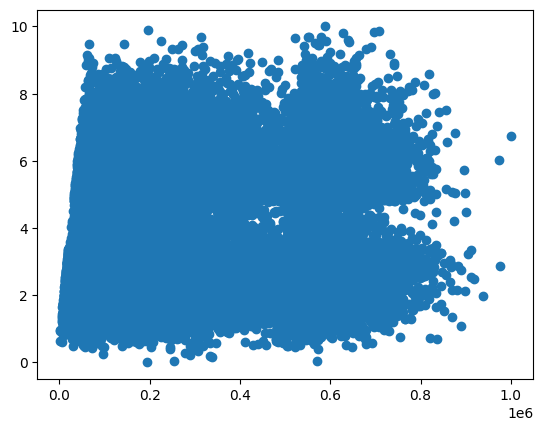

In [12]:
# Plot the relationship between the response variable 'risk' and predictors to see if they may be linearly related
plt.scatter(df['avgMonthlyIncome'], y = df['risk'])

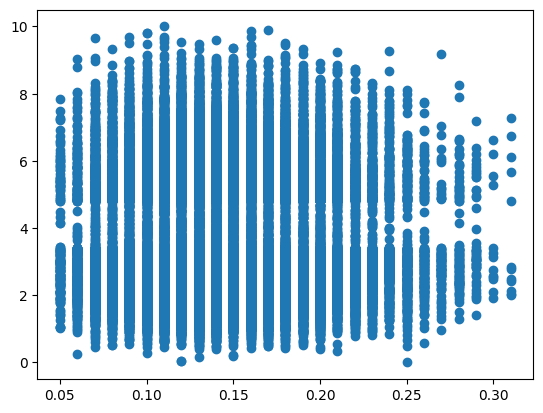

In [13]:
plt.scatter(df['expSavings'], y = df['risk'])

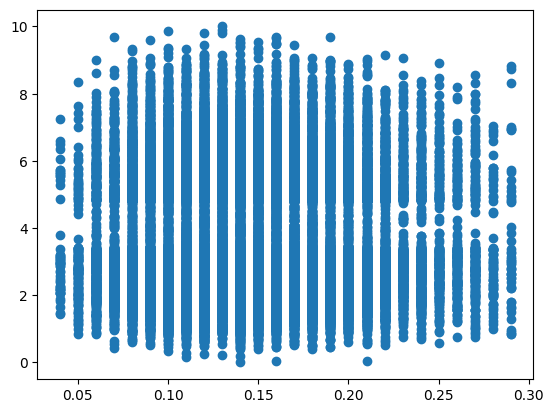

In [14]:
plt.scatter(df['expTransport'], y = df['risk'])

It's unlikely that linear regression will be a good model from these graphs. However, let's first try linear regression model to see how it fits the data.

In [15]:
# Split train and test sets
from sklearn.model_selection import train_test_split
x = df.drop(['risk'], axis = 1)
y = df['risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40320, 21), (10080, 21), (40320,), (10080,))

In [16]:
train = pd.concat([x_train, y_train], axis = 1)

In [17]:
test = pd.concat([x_test, y_test], axis = 1)

# LINEAR REGRESSION MODEL

In [18]:
# Linear regression model
import statsmodels.formula.api as smf
LR_model = smf.ols(formula = 'risk ~' + '+'.join(train.columns.difference(['risk'])), data = train).fit()

In [19]:
from sklearn.metrics import r2_score

preds_LR = LR_model.predict(x_train)
print(f'R2 of linreg-model: {r2_score(y_train, preds_LR)}')
preds_LR = LR_model.predict(x_test)
print(f'R2 of linreg-model OOS: {r2_score(y_test, preds_LR)}')

R2 of linreg-model: 0.7321745396554018
R2 of linreg-model OOS: 0.7259103900996985


In [20]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     5798.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:14:15   Log-Likelihood:                -51244.
No. Observations:               40320   AIC:                         1.025e+05
Df Residuals:                   40300   BIC:                         1.027e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8209      2.272     -0.361      0.718      -5.274       3.633
Day                         -0.8209      2.272     -0.361      0.718      -5.274       3.633
Month                       -0.0001      0.001     -0.104      0.917      -0.003       0.002
Year                         0.0026      0.003      1.017      0.309      -0.002       0.007
amountDeposit             6.312e-08   4.65e-08      1.357      0.175   -2.81e-08    1.54e-07
amountLoan                2.287e-06   6.54e-08     34.965      0.000    2.16e-06    2.41e-06
avgMonthlyIncome          1.317e-07   2.08e-08      6.345      0.000     9.1e-08    1.72e-07
avgNumTransactions          -0.0001   1.44e-05     -7.141      0.000      -0.000   -7.48e-05
avgTransaction           -1.143e-06   2.73e-07     -4.186      0.000   -1.68e-06   -6.08e-07
cardLevel                   -0.2092      0.005    -46.321      0.000      -0.218      -0.200
education_BSc               -0.4418      0.568     -0.778      0.437      -1.555       0.672
education_MSc               -1.1113      0.568     -1.956      0.050      -2.225       0.002
education_PhD               -1.2619      0.568     -2.221      0.026      -2.375      -0.148
education_college            1.9941      0.568      3.510      0.000       0.880       3.108
expGroceries                 0.3126      0.584      0.535      0.592      -0.832       1.457
expLeisure                   0.2963      0.581      0.510      0.610      -0.842       1.434
expOther                     0.2133      0.585      0.365      0.715      -0.932       1.359
expSavings                   0.3737      0.586      0.638      0.524      -0.774       1.522
expShopping                  0.1856      0.583      0.318      0.750      -0.957       1.328
expTransport                 0.3579      0.581      0.616      0.538      -0.781       1.496
expUtilities                 0.1998      0.583      0.342      0.732      -0.944       1.343
largestSingleTransaction  3.146e-07   6.16e-08      5.107      0.000    1.94e-07    4.35e-07
==============================================================================
Omnibus:                     8443.516   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75517.760
Skew:                           0.756   Prob(JB):                         0.00
Kurtosis:                       9.532   Cond. No.                     1.99e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We can observe from the p-value that variables 'amountLoan', 'avgMonthlyIncome', 'avgNumTransactions', 'avgTransaction', 'cardLevel', 'education_BSc', 'education_MSc', 'education_PhD', 'largestSingleTransaction' can be concluded as significant variables. 

# REGRESSION TREE MODEL

In [21]:
# Regression tree model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Range for the complexity parameter value
grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

# The decision tree regressor
dtr = DecisionTreeRegressor(min_samples_leaf = 5, min_samples_split = 10, random_state = 10)

# To find the optimal complexity parameter value using 5-fold cross validation
dtr_cv = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv = 5 , verbose = 0)
dtr_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=10,
                                             random_state=10),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

In [22]:
# Print the optimal complexity parameter value for our model
print('Best ccp_alpha', dtr_cv.best_params_) 

Best ccp_alpha {'ccp_alpha': 0.00062}


In [23]:
# Regression tree model with the optimal ccp alpha value
dtr_final = DecisionTreeRegressor(min_samples_leaf = 5, 
                                  min_samples_split = 20, 
                                  ccp_alpha = 2e-05,
                                  random_state = 10)
dtr_final.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=2e-05, min_samples_leaf=5, min_samples_split=20,
                      random_state=10)

In [24]:
# Random forest model
from sklearn.ensemble import RandomForestRegressor

# Range for the max_features
grid_values = {'max_features': np.linspace(1,18,9, dtype = 'int32')} 

# Random forest model
rf = RandomForestRegressor(min_samples_leaf = 5, n_estimators = 500, random_state = 10) 

# Choosing the max features by a 5-fold cross validation
rf_cv = GridSearchCV(rf, param_grid = grid_values, scoring = 'r2', cv = 5)
rf_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(min_samples_leaf=5,
                                             n_estimators=500,
                                             random_state=10),
             param_grid={'max_features': array([ 1,  3,  5,  7,  9, 11, 13, 15, 18], dtype=int32)},
             scoring='r2')

In [25]:
print(rf_cv.best_params_)

{'max_features': 15}


In [26]:
# Random forest model with the optimal max_features value
rf_final = RandomForestRegressor(min_samples_leaf = 5, 
                                 n_estimators = 500, 
                                 max_features = 15,
                                 random_state = 10) 
rf_final.fit(x_train, y_train)

RandomForestRegressor(max_features=15, min_samples_leaf=5, n_estimators=500,
                      random_state=10)

In [27]:
# Define a function to compute the out-of-sample R-squared of a model using the test set
def OSR2(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    
    return 1 - SSE/SST

# EVALUATION

In [28]:
pd.DataFrame({'R2 Score':[OSR2(LR_model, train, test, 'risk'), 
                          round(r2_score(y_test, dtr_final.predict(x_test)), 5),
                          round(r2_score(y_test, rf_final.predict(x_test)), 5)
                          ],
            },
             index=['Linear Regression', "Regression Tree", "Random Forest"])

,R2 Score
Linear Regression,0.725935
Regression Tree,0.906460
Random Forest,0.930240


### Based on $OSR^2$ values, random forest model performs the best.

# NON CONTINUOUS VARIABLE -- CLASSIFICATION
We tried to define a user with risky investment behavior, when the risk is greater than 0.5.

In [58]:
from sklearn.model_selection import train_test_split

df["risky_behaviour"] = [1 if x > 5 else 0 for x in df["risk"]]

x = df.drop(['risk', 'risky_behaviour'], axis = 1)
y = df['risky_behaviour']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40320, 21), (10080, 21), (40320,), (10080,))

Using a **Linear Regression Model** to make predictions

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linreg = LinearRegression().fit(x_train, y_train)

In [60]:
preds = linreg.predict(x_train)
print(f'R2 of linreg-model: {r2_score(y_train, preds)}')
preds = linreg.predict(x_test)
print(f'R2 of linreg-model OOS: {r2_score(y_test, preds)}')

R2 of linreg-model: 0.6917039873667037
R2 of linreg-model OOS: 0.6868382922211328


Using a **Random Forests** to make predictions

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
x_train.shape

(40320, 21)

In [62]:
parameters = {'max_samples': range(1,x_train.shape[1]), 
              'ccp_alpha':[10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1]
             }

rf_gridsearch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, error_score='raise').fit(x_train, y_train)
bp = rf_gridsearch.best_params_
bp

{'ccp_alpha': 0.0001, 'max_samples': 19}

In [63]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=bp['ccp_alpha'], max_samples=bp['max_samples']).fit(x_train, y_train)

In [64]:
preds = rf.predict(x_train)
print(f'R2 of random forest model: {r2_score(y_train, preds)}')
preds = rf.predict(x_test)
print(f'R2 of random forest model OOS: {r2_score(y_test, preds)}')

R2 of random forest model: 0.6963740538193668
R2 of random forest model OOS: 0.6906031669367726


Using a **Ridge Regression** to make predictions

In [65]:
from sklearn.linear_model import Ridge

In [66]:
parameters = {'alpha': [x/100 for x in range(0,101)]}

rr_gridsearch = GridSearchCV(estimator=Ridge(), param_grid=parameters).fit(x_train, y_train)
bp = rr_gridsearch.best_params_
bp

{'alpha': 0.16}

In [67]:
rr = Ridge(alpha=bp['alpha']).fit(x_train, y_train)

In [68]:
preds = rr.predict(x_train)
print(f'R2 of ridge regression model: {r2_score(y_train, preds)}')
preds = rr.predict(x_test)
print(f'R2 of ridge regression OOS: {r2_score(y_test, preds)}')

R2 of ridge regression model: 0.6917017627516369
R2 of ridge regression OOS: 0.6868430188154099


Using a **Logistic Regression** to make predictions

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
# Logistic Regression model
log_reg = LogisticRegression(random_state=55, max_iter=2000) 
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=2000, random_state=55)

**Result** - Logistic Regression Model

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [72]:
y_prob = log_reg.predict_proba(x_test)
y_pred_log = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)
                       
cm_log = confusion_matrix(y_test, y_pred_log)
print ("Confusion Matrix: \n", cm_log)

Confusion Matrix: 
 [[7537   17]
 [2464   62]]


In [73]:
acc_log = accuracy_score(y_test, y_pred_log)
TPR_log = cm_log[1][1]/(cm_log[1][0]+cm_log[1][1])
FPR_log = cm_log[0][1]/(cm_log[0][0]+cm_log[0][1])

print ("Accuracy:", acc_log)
print ("TPR:", TPR_log)
print ("FPR:", FPR_log)

Accuracy: 0.7538690476190476
TPR: 0.02454473475851148
FPR: 0.0022504633306857295


<AxesSubplot: >

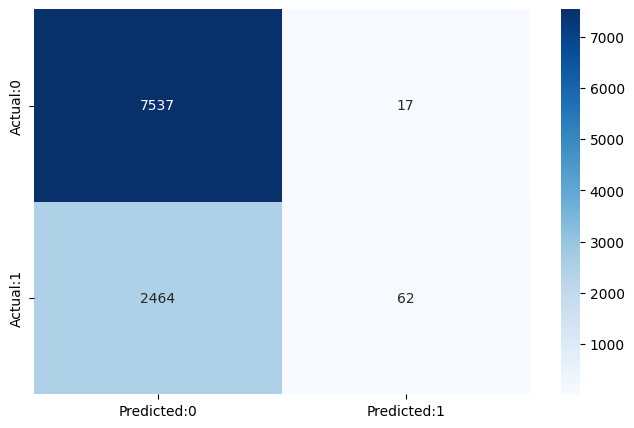

In [74]:
import seaborn as sns

conf_matrix = pd.DataFrame(data=cm_log, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

Using **CART** to make predictions

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 1)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=2).fit(x_train, y_train)

**Result** - CART

Node count = 1499


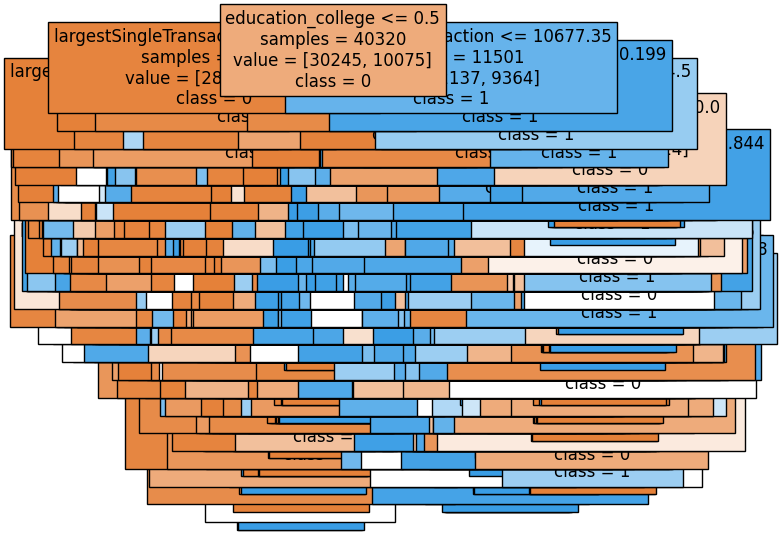

In [76]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)

plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=x_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 

plt.show()

In [77]:
y_pred_dtc = dtc_cv.predict(x_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print ("Confusion Matrix: \n", cm_dtc)

Confusion Matrix: 
 [[7407  147]
 [ 127 2399]]


In [78]:
acc_dtc = accuracy_score(y_test, y_pred_dtc)
TPR_dtc = cm_dtc[1][1]/(cm_dtc[1][0]+cm_dtc[1][1])
FPR_dtc = cm_dtc[0][1]/(cm_dtc[0][0]+cm_dtc[0][1])

print ("Accuracy:", acc_dtc)
print ("TPR:", TPR_dtc)
print ("FPR:", FPR_dtc)

Accuracy: 0.9728174603174603
TPR: 0.94972288202692
FPR: 0.019459888800635424


Using **LDA** to make predictions

In [79]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [81]:
y_prob = lda.predict_proba(x_test)
y_pred_lda = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm_lda = confusion_matrix(y_test, y_pred_lda)
print ("Confusion Matrix: \n", cm_lda)

Confusion Matrix: 
 [[7001  553]
 [ 180 2346]]


In [82]:
acc_lda = accuracy_score(y_test, y_pred_lda)
TPR_lda = cm_lda[1][1]/(cm_lda[1][0]+cm_lda[1][1])
FPR_lda = cm_lda[0][1]/(cm_lda[0][0]+cm_lda[0][1])

print ("Accuracy:", acc_lda)
print ("TPR:", TPR_lda)
print ("FPR:", FPR_lda)

Accuracy: 0.9272817460317461
TPR: 0.9287410926365796
FPR: 0.07320624834524755


# EVALUATION

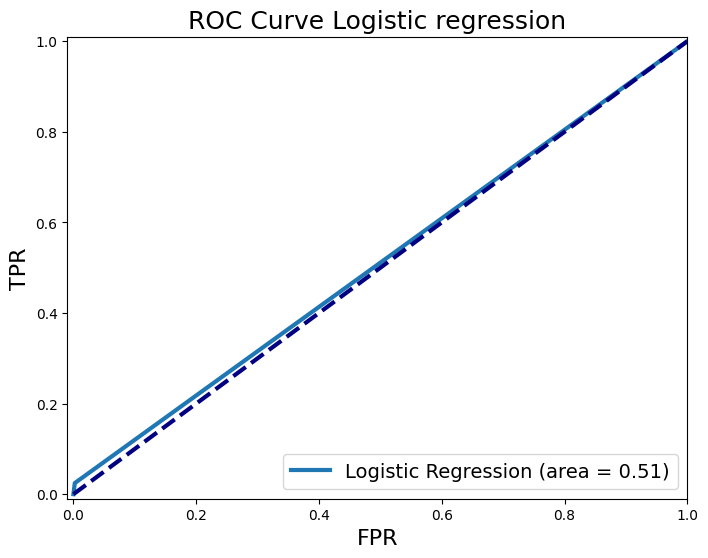

In [83]:
# Calculate AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve Logistic regression', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

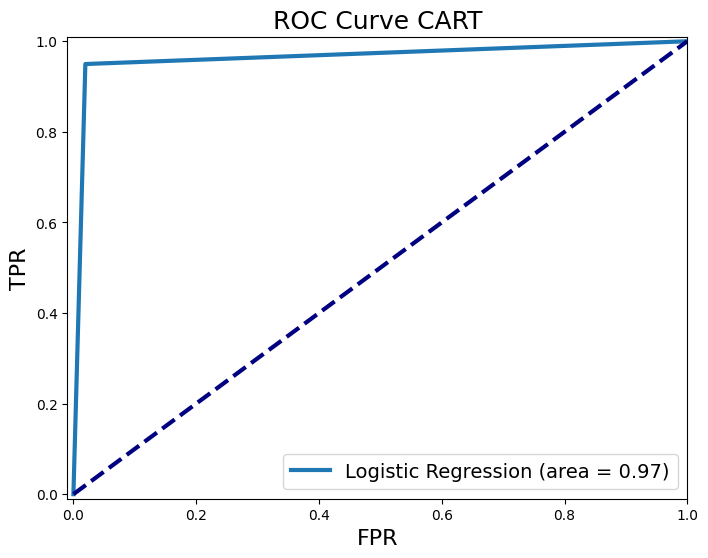

In [84]:
fpr, tpr, _ = roc_curve(y_test, y_pred_dtc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve CART', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

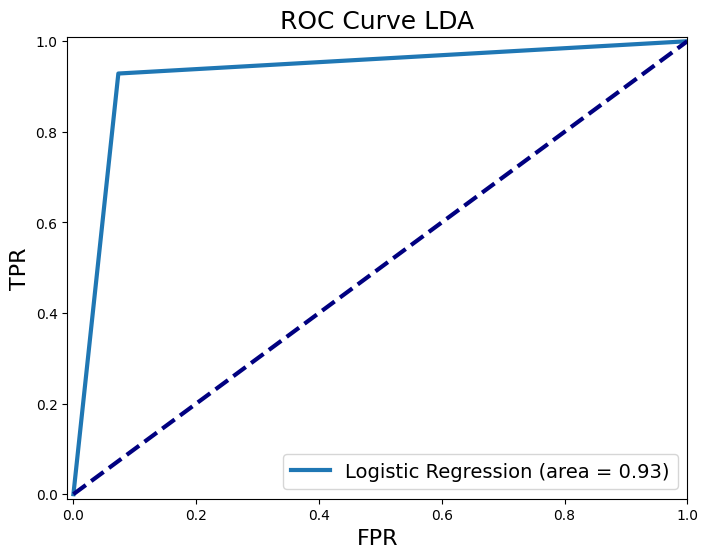

In [85]:
fpr, tpr, _ = roc_curve(y_test, y_pred_lda)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve LDA', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [86]:
pd.DataFrame({'Logistic Regression':[acc_log,TPR_log,FPR_log],
             'CART':[acc_dtc,TPR_dtc,FPR_dtc],
             'LDA':[acc_lda,TPR_lda,FPR_lda]},
             index=['Accuracy','TPR','FPR'])

,Logistic Regression,CART,LDA
Accuracy,0.753869,0.972817,0.927282
TPR,0.024545,0.949723,0.928741
FPR,0.002250,0.019460,0.073206


### Based on accuracy, TPR and FRP values, CART model performs the best.